In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from joblib import Parallel
from joblib import delayed
import matplotlib.pyplot as plt
from collections import ChainMap
from util import *

In [2]:
x_train, x_test, x_oot, y_train, y_test, y_oot = load_data('var_30.csv')
x_train.head()

,ssn_count_3,fulladdress_count_0,address_count_0,name_dob_count_3,homephone_count_14,name_dob_count_7,name_day_since,ssn_firstname_count_0_by_14,name_count_7,fulladdress_homephone_count_0_by_14,...,ssn_count_0_by_14,ssn_firstname_count_7,ssn_count_7,fulladdress_count_1_by_14,fulladdress_homephone_count_7,ssn_name_dob_count_7,name_count_14,ssn_firstname_count_0_by_30,ssn_lastname_count_0_by_30,ssn_count_14
244621,-0.047591,-0.041351,-0.042158,-0.046415,0.708788,-0.055801,0.598116,0.123528,-0.115648,0.120387,...,0.124781,-0.057185,-0.058092,0.123861,-0.057263,-0.055635,-0.159376,0.171472,0.171458,-0.072421
536321,-0.047591,-0.041351,-0.042158,-0.046415,-1.011308,-0.055801,0.598116,0.123528,-0.115648,0.120387,...,0.124781,-0.057185,-0.058092,0.123861,-0.057263,-0.055635,-0.159376,0.171472,0.171458,-0.072421
288505,-0.047591,-0.041351,-0.042158,-0.046415,0.135423,-0.055801,0.598116,0.123528,-0.115648,0.120387,...,0.124781,-0.057185,-0.058092,0.123861,-0.057263,-0.055635,-0.159376,0.171472,0.171458,-0.072421
669993,-0.047591,-0.041351,-0.042158,-0.046415,1.282153,-0.055801,-0.512151,0.123528,-0.115648,0.120387,...,0.124781,-0.057185,-0.058092,0.123861,-0.057263,-0.055635,-0.159376,0.171472,0.171458,-0.072421
219303,-0.047591,-0.041351,-0.042158,-0.046415,0.135423,-0.055801,0.598116,0.123528,-0.115648,0.120387,...,0.124781,-0.057185,-0.058092,0.123861,-0.057263,-0.055635,-0.159376,0.171472,0.171458,-0.072421


In [3]:
def fit_and_calculate_fdr(original_param, setting, label, color):
    params = ChainMap(setting, original_param)
    bt = GradientBoostingClassifier(**params).fit(x_train, y_train)

    test_score = [fdr_prob(y_test, y_pred_prob)
                  for y_pred_prob in bt.staged_predict_proba(x_test)]
    return label, color, test_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 22.6min remaining: 33.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 30.6min finished


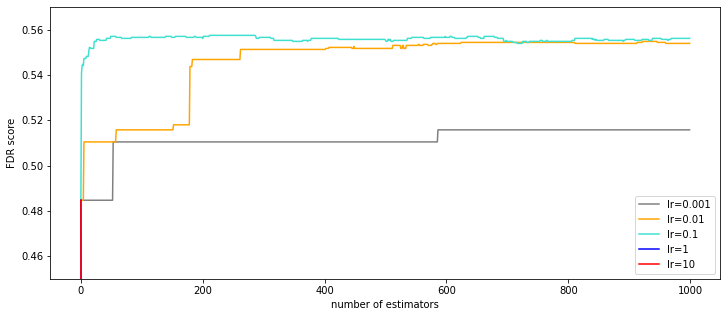

In [4]:
original_param = {'max_depth': 5, 'n_estimators': 1000}

test_scores = Parallel(n_jobs=-1, verbose=1, prefer='processes')(
    delayed(fit_and_calculate_fdr)(original_param, setting, label, color)
    for label, color, setting in [
        ('lr=0.001', 'gray', {'learning_rate': 0.001}),
        ('lr=0.01', 'orange', {'learning_rate': 0.01}),
        ('lr=0.1', 'turquoise', {'learning_rate': 0.1}),
        ('lr=1', 'blue', {'learning_rate': 1}),
        ('lr=10', 'red', {'learning_rate': 10})]
)

plt.figure(figsize=(12, 5))
for label, color, test_score in test_scores:
    plt.plot(range(original_param['n_estimators']), test_score,
             '-', color=color, label=label)
plt.ylim((0.45, 0.57))
plt.xlabel('number of estimators')
plt.ylabel('FDR score')
plt.legend(loc='lower right')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 20.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 20.7min finished


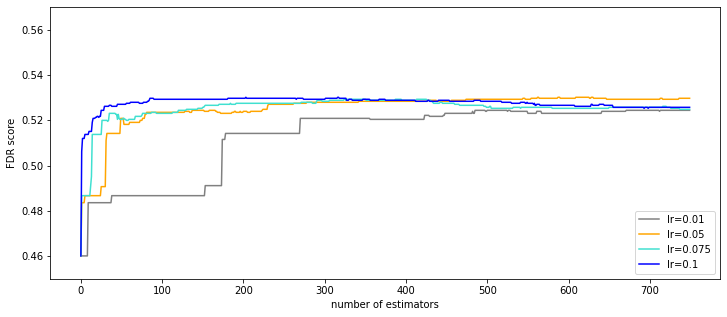

In [4]:
original_param = {'max_depth': 5, 'n_estimators': 750}

test_scores = Parallel(n_jobs=-1, verbose=1, prefer='processes')(
    delayed(fit_and_calculate_fdr)(original_param, setting, label, color)
    for label, color, setting in [
        ('lr=0.01', 'gray', {'learning_rate': 0.01}),
        ('lr=0.05', 'orange', {'learning_rate': 0.05}),
        ('lr=0.075', 'turquoise', {'learning_rate': 0.075}),
        ('lr=0.1', 'blue', {'learning_rate': 0.1})]
)

plt.figure(figsize=(12, 5))
for label, color, test_score in test_scores:
    plt.plot(range(original_param['n_estimators']), test_score,
             '-', color=color, label=label)
plt.ylim((0.45, 0.57))
plt.xlabel('number of estimators')
plt.ylabel('FDR score')
plt.legend(loc='lower right')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 16.2min finished


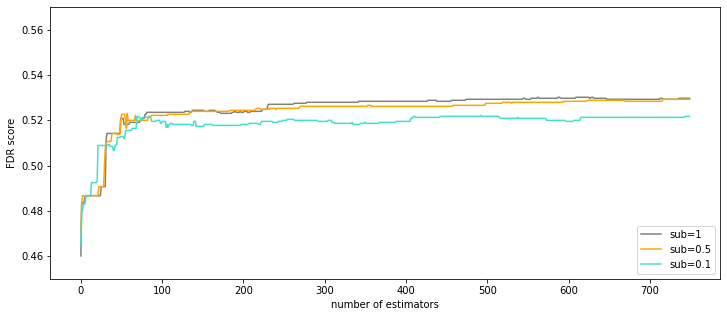

In [5]:
original_param = {'max_depth': 5, 'n_estimators': 750, 'learning_rate': 0.05}

test_scores = Parallel(n_jobs=-1, verbose=1, prefer='processes')(
    delayed(fit_and_calculate_fdr)(original_param, setting, label, color)
    for label, color, setting in [
        ('sub=1', 'gray', {'subsample': 1}),
        ('sub=0.5', 'orange', {'subsample': 0.5}),
        ('sub=0.1', 'turquoise', {'subsample': 0.1})]
)

plt.figure(figsize=(12, 5))
for label, color, test_score in test_scores:
    plt.plot(range(original_param['n_estimators']), test_score,
             '-', color=color, label=label)
plt.ylim((0.45, 0.57))
plt.xlabel('number of estimators')
plt.ylabel('FDR score')
plt.legend(loc='lower right')
plt.show()

In [8]:
bt = GradientBoostingClassifier(learning_rate=0.05, n_estimators=750, warm_start=True)
params = {'subsample': [0.5, 0.75, 1],
          'max_depth': [2, 5, 7]}
grid = GridSearchCV(bt, params, cv=4, refit='FDR', 
                    verbose=1, n_jobs=6,
                    scoring={'FDR': fdr})
grid.fit(x_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed: 58.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=750,
                                                  n_iter_no_change=None,
        

In [9]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")
pd.DataFrame(grid.cv_results_).sort_values('rank_test_FDR').filter(
    items=['param_max_depth', 'param_subsample', 
           'mean_test_FDR', 'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

The best parameters are {'max_depth': 5, 'subsample': 0.5} with a score of 0.55393


,param_max_depth,param_subsample,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
3,5,0.5,0.553928,0.009736,1,0.780742,0.007788
4,5,0.75,0.553928,0.009471,1,0.779905,0.007165
5,5,1,0.553385,0.009700,3,0.780156,0.006833
6,7,0.5,0.549913,0.010574,4,0.777287,0.007916
8,7,1,0.549805,0.010036,5,0.776444,0.008215
2,2,1,0.549262,0.011055,6,0.780128,0.006035
1,2,0.75,0.548937,0.009994,7,0.778782,0.005487
7,7,0.75,0.548937,0.011728,7,0.775662,0.009341
0,2,0.5,0.548286,0.011282,9,0.778037,0.007956


In [10]:
bt = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=5, warm_start=True)
params = {'n_estimators': [500, 750, 1000]}
grid = GridSearchCV(bt, params, cv=4, refit='FDR', 
                    verbose=1, n_jobs=6,
                    scoring={'FDR': fdr})
grid.fit(x_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 out of  12 | elapsed: 15.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [11]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")
pd.DataFrame(grid.cv_results_).sort_values('rank_test_FDR').filter(
    items=['param_n_estimators',
           'mean_test_FDR', 'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

The best parameters are {'n_estimators': 500} with a score of 0.55393


,param_n_estimators,mean_test_FDR,std_test_FDR,rank_test_FDR
0,500,0.553928,0.009890,1
1,750,0.553494,0.009381,2
2,1000,0.553385,0.009940,3


In [12]:
bt = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=5, warm_start=True)
params = {'n_estimators': [200, 400, 500, 600]}
grid = GridSearchCV(bt, params, cv=4, refit='FDR', 
                    verbose=1, n_jobs=6,
                    scoring={'FDR': fdr})
grid.fit(x_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed: 11.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [13]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")
pd.DataFrame(grid.cv_results_).sort_values('rank_test_FDR').filter(
    items=['param_n_estimators',
           'mean_test_FDR', 'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

The best parameters are {'n_estimators': 500} with a score of 0.55414


,param_n_estimators,mean_test_FDR,std_test_FDR,rank_test_FDR
2,500,0.554145,0.009127,1
1,400,0.554036,0.009311,2
3,600,0.553711,0.009726,3
0,200,0.552517,0.009720,4


In [14]:
bt = GradientBoostingClassifier(max_depth=5,
                                n_estimators=500,
                                learning_rate=0.05,
                                subsample=0.5).fit(x_train, y_train)
print(fdr(bt, x_train, y_train))
print(fdr(bt, x_test, y_test))
print(fdr(bt, x_oot, y_oot))

0.5571831597222222
0.5274822695035462
0.5391989044847655


In [15]:
x_train_40, x_test_40, x_oot_40, y_train_40, y_test_40, y_oot_40 = load_data('var_40.csv')
bt = GradientBoostingClassifier(max_depth=5,
                                n_estimators=500,
                                learning_rate=0.05,
                                subsample=0.5).fit(x_train_40, y_train_40)
print(fdr(bt, x_train_40, y_train_40))
print(fdr(bt, x_test_40, y_test_40))
print(fdr(bt, x_oot_40, y_oot_40))

0.5610741185460103
0.5395932496754652
0.5436494351249572
